In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

from datetime import date,datetime

from keplergl import KeplerGl

from AuxiliaresDiplo import freq,normalizar
cf.go_offline()
pd.set_option('display.max_columns',500)

In [ ]:
df = pd.read_csv('/home/armando/Documentos/bd/delitos/carpetas-de-investigacion-pgj-cdmx.csv')
df = df.loc[df['categoria_delito']!='HECHO NO DELICTIVO'].reset_index(drop=True)
df = df.loc[df['delito'].map(lambda x:('VIOLENCIA' in x) and ('SIN' not in x) )].reset_index(drop=True)
df['fecha_hechos'] = pd.to_datetime(df['fecha_hechos'],errors='coerce')
df = df.loc[~df['fecha_hechos'].isnull()].reset_index(drop=True)
df = df.loc[df['fecha_hechos']>=datetime(2016,1,1)].reset_index(drop=True)

In [ ]:
df.head()

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
1,4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"
2,5,2018.0,Mayo,2018-05-21 20:40:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2SD,INFONAVIT IZTACALCO,IZTACALCO,2018-05-22 10:52:18,Mayo,2018,FRANCISCO DEL PASO Y TRONCOSO,ISLA,-99.111563,19.386594,"19.3865939284,-99.1115626682"
3,6,2018.0,Mayo,2018-05-22 06:20:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-1SD,TLACOQUEMECATL,BENITO JUAREZ,2018-05-22 11:09:00,Mayo,2018,AV. DE LOS INSURGENTES SUR,NaN,-99.177100,19.379581,"19.3795809108,-99.1771001785"
4,18,2017.0,Noviembre,2017-11-01 23:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-1CD,CENTRO,CUAUHTEMOC,2017-11-01 23:42:11,Noviembre,2017,MADERO,PALMA,-99.135123,19.434112,"19.4341119806,-99.1351225056"


In [ ]:
df.shape

(178610, 19)

In [ ]:
cols = ['fecha_hechos',
 'delito',
 'categoria_delito',
 'colonia_hechos',
 'alcaldia_hechos',
 'calle_hechos',
 'longitud','latitud'
]

In [ ]:
df = df[cols].copy()

In [ ]:
df.head()

,fecha_hechos,delito,categoria_delito,colonia_hechos,alcaldia_hechos,calle_hechos,longitud,latitud
0,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,SUR 117,-99.106072,19.395398
1,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,TARASCO,-99.042786,19.319141
2,2018-05-21 20:40:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INFONAVIT IZTACALCO,IZTACALCO,FRANCISCO DEL PASO Y TRONCOSO,-99.111563,19.386594
3,2018-05-22 06:20:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,TLACOQUEMECATL,BENITO JUAREZ,AV. DE LOS INSURGENTES SUR,-99.177100,19.379581
4,2017-11-01 23:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,CENTRO,CUAUHTEMOC,MADERO,-99.135123,19.434112


In [ ]:
for c in ['delito','categoria_delito','colonia_hechos','alcaldia_hechos']:
    df = normalizar(df,c,0.03)

In [ ]:
df['mes'] = df['fecha_hechos'].map(lambda x:x.strftime('%Y%m'))
df['semana'] =df['fecha_hechos'].map(lambda x:x.strftime('%Y%W'))

<AxesSubplot:xlabel='semana'>

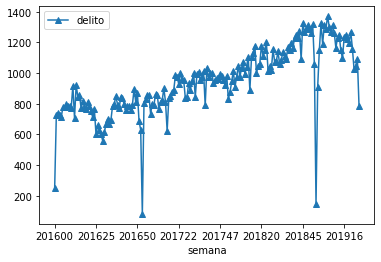

In [ ]:
df[['semana','delito']].groupby('semana').count().sort_index().plot(marker='^')

## Zonas Rojas

In [ ]:
df.colonia_hechos.value_counts().head(20)

CENTRO                            4325
AGRÍCOLA ORIENTAL                 2209
DOCTORES                          1891
MORELOS                           1872
AGRÍCOLA PANTITLAN                1611
BUENAVISTA                        1460
GUERRERO                          1452
DEL VALLE CENTRO                  1389
PEDREGAL DE SANTO DOMINGO         1344
DESARROLLO URBANO QUETZALCOATL    1327
ROMA NORTE                        1304
NARVARTE                          1164
ANAHUAC                           1110
TACUBA                            1067
ZONA CENTRO                       1042
SANTA MARIA LA RIBERA             1034
EL ROSARIO                         950
OBRERA                             928
SANTA CRUZ MEYEHUALCO              923
ERMITA ZARAGOZA                    791
Name: colonia_hechos, dtype: int64

In [ ]:
mapa = KeplerGl(height=600,width=800)
mapa.add_data(data=df,name='delitos')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [ ]:
mapa

KeplerGl(data={'delitos': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,…

## Probabilidad de incidencia del delito $x$ en el tiempo $t$

In [ ]:
aux = df.loc[df['norm_delito']!='SMALL CATEGORIES'].copy().reset_index(drop=True)

In [ ]:
piv = aux.pivot_table(columns='norm_delito',index='semana',values='delito',aggfunc='count')

In [ ]:
for c in piv.columns:
    fig = plt.figure()
    piv[c].iplot(kind='bar',title=c)
    fig.title=c

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
cat = df[['semana']].drop_duplicates()
cat['semana'] = cat['semana'].astype(int)
cat = cat.sort_values(by='semana').reset_index(drop=True)
cat['id'] = cat.index
cat['semana'] = cat['semana'].astype(str)
cat.shape

(185, 2)

In [ ]:
aux = aux.merge(cat,on='semana',how='inner')

In [ ]:
df, ot = [d for n,d in aux.groupby(aux['id']>=159)]

In [ ]:
df.shape,ot.shape

((124338, 15), (25103, 15))

In [ ]:
vobs = 6
vdes = 1
anclai,anclaf = df.id.min(),df.id.max()
anclai,anclaf = anclai+vobs-1,anclaf-vdes
anclai,anclaf

(5, 157)

In [ ]:
df.head(2)

,fecha_hechos,delito,categoria_delito,colonia_hechos,alcaldia_hechos,calle_hechos,longitud,latitud,norm_delito,norm_categoria_delito,norm_colonia_hechos,norm_alcaldia_hechos,mes,semana,id
0,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,SUR 117,-99.106072,19.395398,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,SMALL CATEGORIES,IZTACALCO,201711,201744,97
1,2017-10-30 11:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,TLACOTAL C,-99.105688,19.395623,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,SMALL CATEGORIES,IZTACALCO,201710,201744,97


In [ ]:
um = ['norm_delito','ancla']
ancla = 20
list(range(ancla-vobs+1,ancla+1))

[15, 16, 17, 18, 19, 20]

In [ ]:
def ing_dias_sem(df,ancla):
    aux = df.loc[(df['id']>=(ancla-vobs+1))&(df['id']<=ancla)].copy()
    aux['dia_sem']= aux['fecha_hechos'].map(lambda x:x.weekday()).replace(dict(zip(range(7),'LMXJVSD')))
    aux = aux[['norm_delito','dia_sem','id','mes']].groupby(['norm_delito','id','dia_sem']).count()
    aux = aux.reset_index()
    aux = aux.pivot_table(index='norm_delito',columns='dia_sem',values='mes',aggfunc=['sum','min','max','mean','std','median'])
    aux.columns = [f'{x}_{y}_{vobs}' for x,y in aux.columns]
    aux.reset_index(inplace=True)
    aux.insert(1,'ancla',ancla)
    return aux

In [ ]:
ing_dias_sem(df,20)

,norm_delito,ancla,sum_D_6,sum_J_6,sum_L_6,sum_M_6,sum_S_6,sum_V_6,sum_X_6,min_D_6,min_J_6,min_L_6,min_M_6,min_S_6,min_V_6,min_X_6,max_D_6,max_J_6,max_L_6,max_M_6,max_S_6,max_V_6,max_X_6,mean_D_6,mean_J_6,mean_L_6,mean_M_6,mean_S_6,mean_V_6,mean_X_6,std_D_6,std_J_6,std_L_6,std_M_6,std_S_6,std_V_6,std_X_6,median_D_6,median_J_6,median_L_6,median_M_6,median_S_6,median_V_6,median_X_6
0,ROBO A NEGOCIO CON VIOLENCIA,20,41,51,43,44,40,38,39,5,5,2,4,2,3,5,9,14,10,10,12,9,8,6.833333,8.500000,7.166667,7.333333,6.666667,6.333333,6.500000,1.834848,3.563706,2.926887,2.160247,4.366539,2.422120,1.378405,6.5,8.0,8.0,7.5,5.5,6.0,6.5
1,ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VI...,20,12,26,20,28,14,15,23,1,1,1,2,1,1,1,4,8,6,9,4,5,6,2.400000,4.333333,3.333333,4.666667,2.333333,2.500000,3.833333,1.516575,2.503331,1.632993,2.732520,1.211060,1.378405,1.722401,2.0,4.0,3.0,3.5,2.5,2.0,4.0
2,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,20,47,50,50,53,53,54,53,6,6,5,7,6,5,3,10,11,14,12,13,13,15,7.833333,8.333333,8.333333,8.833333,8.833333,9.000000,8.833333,1.722401,2.250926,3.265986,1.722401,2.483277,2.898275,4.400758,8.0,8.5,7.5,8.5,8.5,9.0,9.0
3,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,20,92,99,130,112,118,102,123,11,15,16,12,11,13,15,22,18,28,22,28,20,29,15.333333,16.500000,21.666667,18.666667,19.666667,17.000000,20.500000,4.179314,1.048809,4.273952,3.559026,6.314006,2.529822,5.718391,14.5,16.5,22.0,19.5,18.0,17.0,20.0
4,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,20,21,38,37,28,22,30,30,1,4,2,2,1,3,2,7,8,12,9,7,8,9,3.500000,6.333333,6.166667,4.666667,3.666667,5.000000,5.000000,2.167948,1.861899,3.430258,2.503331,2.503331,2.097618,2.529822,3.0,7.0,6.0,4.0,3.5,4.5,5.0
5,VIOLENCIA FAMILIAR,20,459,293,332,316,329,314,287,59,42,43,43,35,45,41,94,55,63,58,63,75,56,76.500000,48.833333,55.333333,52.666667,54.833333,52.333333,47.833333,13.457340,5.036533,8.547904,5.046451,10.264827,11.843423,6.369197,76.0,48.5,59.5,54.0,59.0,46.0,46.5


In [ ]:
def ing_rachas(df,ancla):
    aux = df.loc[(df['id']>=(ancla-vobs+1))&(df['id']<=ancla)].copy()
    aux = aux.pivot_table(index='norm_delito',
                          fill_value=0,
                          columns='id',
                          values='mes',
                          aggfunc='count')
    aux = aux.apply(lambda x:x>0)
    aux[aux.columns] =aux[aux.columns].astype(int).astype(str)
    aux['cad'] = aux.apply("".join,axis=1)
    aux['cad'] = aux['cad'].map(lambda x:max(map(len,x.split('0'))))
    aux.rename(columns={'cad':'max_racha_presencia_delito'},inplace=True)
    aux = aux[['max_racha_presencia_delito']].reset_index()
    aux.insert(1,'ancla',ancla)
    return aux

In [ ]:
def ing_alc_mas_frec(df,ancla):
    aux = df.loc[(df['id']>=(ancla-vobs+1))&(df['id']<=ancla)].copy()
    aux = aux.pivot_table(index='norm_delito',columns='norm_alcaldia_hechos',values='mes',aggfunc='count')
    aux['alcaldia_mas_frec'] = aux.idxmax(axis=1)
    aux = aux[['alcaldia_mas_frec']]
    aux = aux.reset_index()
    aux.insert(1,'ancla',ancla)
    return aux

In [ ]:
X = pd.concat(map(lambda ancla:ing_dias_sem(df,ancla),range(anclai,anclaf+1)),ignore_index=True)

In [ ]:
X = X.merge(pd.concat(map(lambda ancla:ing_rachas(df,ancla),
                          range(anclai,anclaf+1)),ignore_index=True),on=um,how='outer')

In [ ]:
X = X.merge(pd.concat(map(lambda ancla:ing_alc_mas_frec(df,ancla),
                          range(anclai,anclaf+1)),ignore_index=True),on=um,how='outer')

In [ ]:
X.head()

,norm_delito,ancla,sum_D_6,sum_J_6,sum_L_6,sum_M_6,sum_S_6,sum_V_6,sum_X_6,min_D_6,min_J_6,min_L_6,min_M_6,min_S_6,min_V_6,min_X_6,max_D_6,max_J_6,max_L_6,max_M_6,max_S_6,max_V_6,max_X_6,mean_D_6,mean_J_6,mean_L_6,mean_M_6,mean_S_6,mean_V_6,mean_X_6,std_D_6,std_J_6,std_L_6,std_M_6,std_S_6,std_V_6,std_X_6,median_D_6,median_J_6,median_L_6,median_M_6,median_S_6,median_V_6,median_X_6,max_racha_presencia_delito,alcaldia_mas_frec
0,ROBO A NEGOCIO CON VIOLENCIA,5,41,37,45,45,55,49,40,3,6,2,5,7,2,6,12,12,19,15,11,13,10,6.833333,7.4,9.00,9.0,9.166667,8.166667,8.0,3.250641,2.607681,7.314369,4.000000,1.329160,4.070217,1.870829,6.0,6.0,9.0,7.0,9.0,8.0,9.0,6,GUSTAVO A MADERO
1,ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VI...,5,8,26,25,20,16,19,20,1,3,3,1,1,1,1,3,7,8,8,5,6,8,2.000000,5.2,6.25,4.0,3.200000,3.166667,4.0,0.816497,1.643168,2.217356,2.915476,1.483240,2.136976,2.549510,2.0,6.0,7.0,3.0,3.0,3.0,4.0,6,CUAUHTEMOC
2,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,5,41,33,50,37,32,37,29,2,5,6,5,2,4,2,10,8,17,10,8,8,9,6.833333,6.6,10.00,7.4,5.333333,6.166667,5.8,2.786874,1.516575,4.183300,1.816590,2.065591,1.834848,3.492850,7.0,7.0,9.0,7.0,5.0,6.5,8.0,6,IZTAPALAPA
3,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,5,92,100,74,97,96,104,69,8,15,13,15,9,5,8,19,24,17,23,21,23,21,15.333333,20.0,14.80,19.4,16.000000,17.333333,13.8,3.777124,3.605551,2.049390,3.209361,4.335897,6.653320,4.868265,16.0,19.0,14.0,19.0,16.0,19.5,14.0,6,IZTAPALAPA
4,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,5,15,27,30,45,25,23,32,1,3,2,8,1,2,4,5,7,12,10,7,7,9,2.500000,5.4,6.00,9.0,4.166667,4.600000,6.4,1.516575,1.516575,4.062019,1.000000,2.316607,1.949359,1.949359,2.5,6.0,5.0,9.0,4.5,4.0,7.0,6,IZTAPALAPA


array([[<AxesSubplot:title={'center':'ancla'}>,
        <AxesSubplot:title={'center':'sum_D_6'}>,
        <AxesSubplot:title={'center':'sum_J_6'}>,
        <AxesSubplot:title={'center':'sum_L_6'}>,
        <AxesSubplot:title={'center':'sum_M_6'}>,
        <AxesSubplot:title={'center':'sum_S_6'}>,
        <AxesSubplot:title={'center':'sum_V_6'}>],
       [<AxesSubplot:title={'center':'sum_X_6'}>,
        <AxesSubplot:title={'center':'min_D_6'}>,
        <AxesSubplot:title={'center':'min_J_6'}>,
        <AxesSubplot:title={'center':'min_L_6'}>,
        <AxesSubplot:title={'center':'min_M_6'}>,
        <AxesSubplot:title={'center':'min_S_6'}>,
        <AxesSubplot:title={'center':'min_V_6'}>],
       [<AxesSubplot:title={'center':'min_X_6'}>,
        <AxesSubplot:title={'center':'max_D_6'}>,
        <AxesSubplot:title={'center':'max_J_6'}>,
        <AxesSubplot:title={'center':'max_L_6'}>,
        <AxesSubplot:title={'center':'max_M_6'}>,
        <AxesSubplot:title={'center':'max_S_6'}>,


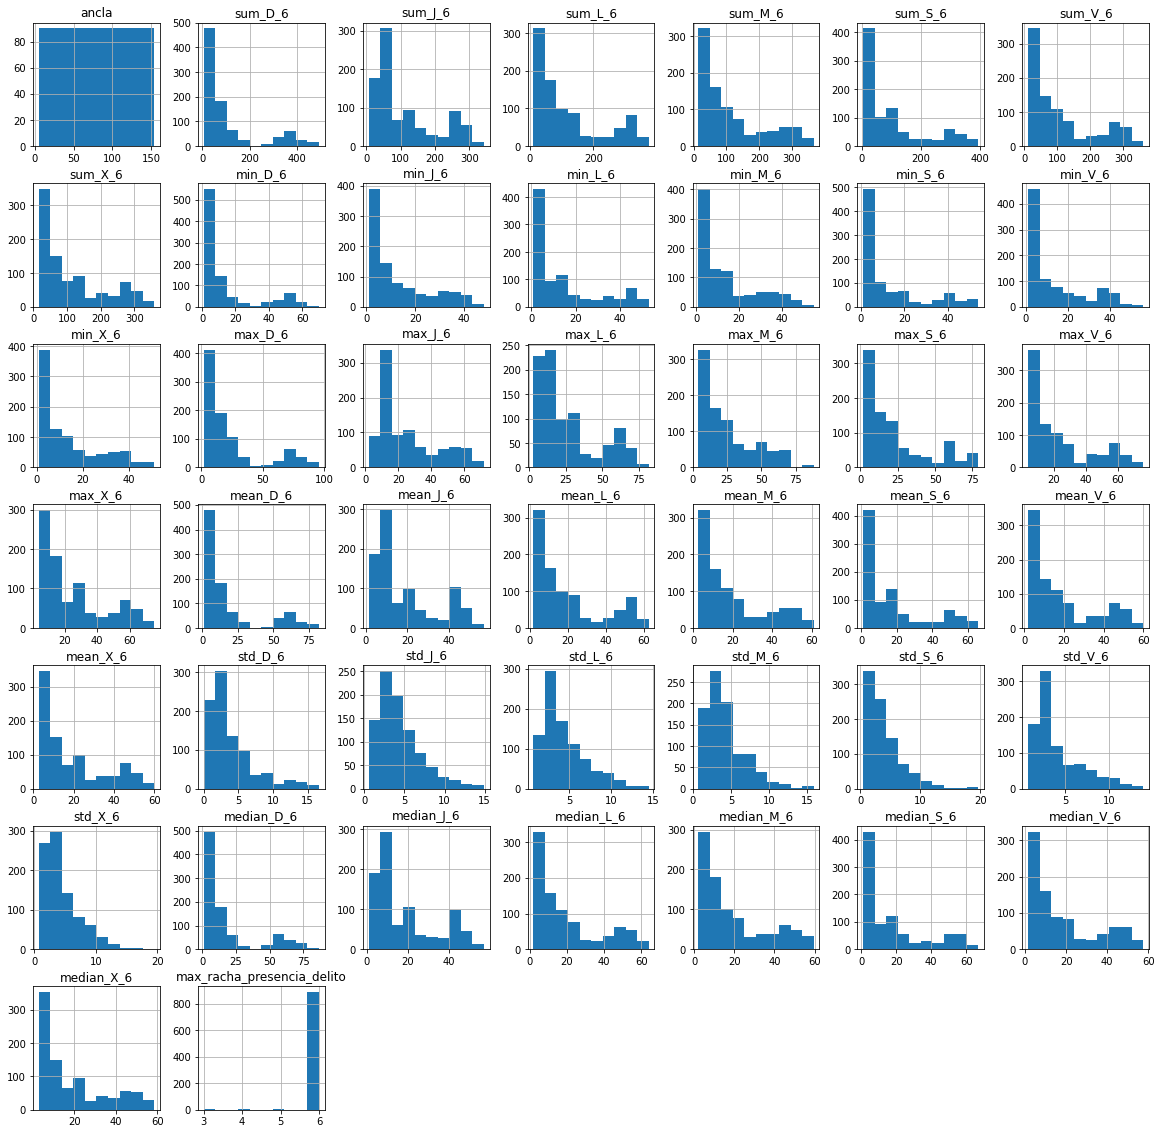

In [ ]:
X.hist(figsize=(20,20))

In [ ]:
freq(X,'alcaldia_mas_frec')

Tabla de frecuencias para la variable ** alcaldia_mas_frec ** 


                   FA        FR  FAA       FRA
IZTAPALAPA        628  0.697778  628  0.697778
ALVARO OBREGON    120  0.133333  748  0.831111
CUAUHTEMOC        113  0.125556  861  0.956667
MIGUEL HIDALGO     26  0.028889  887  0.985556
GUSTAVO A MADERO   12  0.013333  899  0.998889
BENITO JUAREZ       1  0.001111  900  1.000000 




In [ ]:
def target(df,ancla):
    aux = aux = df.loc[(df['id']>=(ancla-vobs+1))&(df['id']<=(ancla+vdes))].copy()
    aux = aux.pivot_table(index='norm_delito',columns='id',values='mes',aggfunc='count')
    aux['media'] = aux.drop(ancla+vdes,axis=1).mean(axis=1)
    aux['target'] = (aux['media']<aux[ancla+vdes]).astype(int)
    return aux[['target']].reset_index().assign(ancla=ancla)

In [ ]:
target(df,20)

id,norm_delito,target,ancla
0,ROBO A NEGOCIO CON VIOLENCIA,1,20
1,ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VI...,0,20
2,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,0,20
3,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,0,20
4,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,1,20
5,VIOLENCIA FAMILIAR,0,20


In [ ]:
y = pd.concat(map(lambda ancla: target(df,ancla),range(anclai,anclaf+1)),ignore_index=True)

In [ ]:
y['target'].value_counts(True)

1    0.53159
0    0.46841
Name: target, dtype: float64

In [ ]:
tad = X.merge(y,on=um,how='inner')

In [ ]:
tad.shape

(900, 47)

In [ ]:
tad.head()

,norm_delito,ancla,sum_D_6,sum_J_6,sum_L_6,sum_M_6,sum_S_6,sum_V_6,sum_X_6,min_D_6,min_J_6,min_L_6,min_M_6,min_S_6,min_V_6,min_X_6,max_D_6,max_J_6,max_L_6,max_M_6,max_S_6,max_V_6,max_X_6,mean_D_6,mean_J_6,mean_L_6,mean_M_6,mean_S_6,mean_V_6,mean_X_6,std_D_6,std_J_6,std_L_6,std_M_6,std_S_6,std_V_6,std_X_6,median_D_6,median_J_6,median_L_6,median_M_6,median_S_6,median_V_6,median_X_6,max_racha_presencia_delito,alcaldia_mas_frec,target
0,ROBO A NEGOCIO CON VIOLENCIA,5,41,37,45,45,55,49,40,3,6,2,5,7,2,6,12,12,19,15,11,13,10,6.833333,7.4,9.00,9.0,9.166667,8.166667,8.0,3.250641,2.607681,7.314369,4.000000,1.329160,4.070217,1.870829,6.0,6.0,9.0,7.0,9.0,8.0,9.0,6,GUSTAVO A MADERO,0
1,ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VI...,5,8,26,25,20,16,19,20,1,3,3,1,1,1,1,3,7,8,8,5,6,8,2.000000,5.2,6.25,4.0,3.200000,3.166667,4.0,0.816497,1.643168,2.217356,2.915476,1.483240,2.136976,2.549510,2.0,6.0,7.0,3.0,3.0,3.0,4.0,6,CUAUHTEMOC,0
2,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,5,41,33,50,37,32,37,29,2,5,6,5,2,4,2,10,8,17,10,8,8,9,6.833333,6.6,10.00,7.4,5.333333,6.166667,5.8,2.786874,1.516575,4.183300,1.816590,2.065591,1.834848,3.492850,7.0,7.0,9.0,7.0,5.0,6.5,8.0,6,IZTAPALAPA,0
3,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,5,92,100,74,97,96,104,69,8,15,13,15,9,5,8,19,24,17,23,21,23,21,15.333333,20.0,14.80,19.4,16.000000,17.333333,13.8,3.777124,3.605551,2.049390,3.209361,4.335897,6.653320,4.868265,16.0,19.0,14.0,19.0,16.0,19.5,14.0,6,IZTAPALAPA,1
4,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,5,15,27,30,45,25,23,32,1,3,2,8,1,2,4,5,7,12,10,7,7,9,2.500000,5.4,6.00,9.0,4.166667,4.600000,6.4,1.516575,1.516575,4.062019,1.000000,2.316607,1.949359,1.949359,2.5,6.0,5.0,9.0,4.5,4.0,7.0,6,IZTAPALAPA,1


In [ ]:
var = ['sum_D_6', 'sum_J_6', 'sum_L_6', 'sum_M_6',
       'sum_S_6', 'sum_V_6', 'sum_X_6', 'min_D_6', 'min_J_6', 'min_L_6',
       'min_M_6', 'min_S_6', 'min_V_6', 'min_X_6', 'max_D_6', 'max_J_6',
       'max_L_6', 'max_M_6', 'max_S_6', 'max_V_6', 'max_X_6', 'mean_D_6',
       'mean_J_6', 'mean_L_6', 'mean_M_6', 'mean_S_6', 'mean_V_6', 'mean_X_6',
       'std_D_6', 'std_J_6', 'std_L_6', 'std_M_6', 'std_S_6', 'std_V_6',
       'std_X_6', 'median_D_6', 'median_J_6', 'median_L_6', 'median_M_6',
       'median_S_6', 'median_V_6', 'median_X_6', 'max_racha_presencia_delito']

In [ ]:
tad[var].describe(percentiles=[0.01,0.99])

,sum_D_6,sum_J_6,sum_L_6,sum_M_6,sum_S_6,sum_V_6,sum_X_6,min_D_6,min_J_6,min_L_6,min_M_6,min_S_6,min_V_6,min_X_6,max_D_6,max_J_6,max_L_6,max_M_6,max_S_6,max_V_6,max_X_6,mean_D_6,mean_J_6,mean_L_6,mean_M_6,mean_S_6,mean_V_6,mean_X_6,std_D_6,std_J_6,std_L_6,std_M_6,std_S_6,std_V_6,std_X_6,median_D_6,median_J_6,median_L_6,median_M_6,median_S_6,median_V_6,median_X_6,max_racha_presencia_delito
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,105.610000,111.255556,118.958889,115.818889,105.584444,110.906667,114.166667,12.844444,13.152222,14.412222,13.957778,12.570000,13.333333,13.356667,23.160000,24.850000,26.184444,25.373333,23.096667,24.322222,25.204444,17.755852,18.689574,19.975352,19.461981,17.744833,18.598741,19.160407,3.911253,4.438183,4.457368,4.285648,4.004680,4.133361,4.488269,17.506667,18.466111,19.785000,19.295000,17.640000,18.468889,19.113333,5.973333
std,126.507638,88.944804,103.003998,95.219631,107.136729,96.100210,94.376645,17.494071,12.423476,14.984904,13.368334,14.958251,13.629697,13.003401,24.797937,17.794425,20.319073,18.758181,21.066096,19.627583,18.906078,21.124521,14.847223,17.186596,15.886917,17.864208,16.017389,15.758566,3.220097,2.690567,2.621713,2.529152,2.937616,2.737089,2.847143,21.170069,14.861456,17.079939,15.973018,17.906346,15.845582,15.793630,0.248152
min,6.000000,7.000000,11.000000,14.000000,5.000000,12.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,2.000000,4.000000,4.000000,1.166667,1.400000,2.000000,2.666667,1.200000,2.000000,2.666667,0.000000,0.547723,0.752773,0.707107,0.447214,0.752773,0.752773,1.000000,1.000000,2.000000,2.000000,1.000000,1.500000,3.000000,3.000000
1%,7.000000,12.980000,15.990000,18.990000,8.000000,15.990000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,6.000000,2.990000,4.000000,5.000000,1.599000,2.599000,2.833000,3.399333,1.600000,2.665000,3.166667,0.499472,0.894427,1.169045,0.982934,0.547723,0.836660,1.032796,1.000000,2.000000,2.000000,3.000000,1.000000,2.495000,3.000000,5.000000
50%,50.000000,63.500000,64.000000,66.000000,50.000000,61.000000,66.500000,5.000000,6.000000,7.000000,8.000000,5.000000,6.000000,7.000000,13.000000,17.000000,17.000000,17.000000,13.000000,14.000000,16.000000,8.500000,10.666667,10.666667,11.000000,8.500000,10.166667,11.250000,2.866460,3.792505,3.633180,3.633180,3.087591,3.060501,3.617088,8.000000,10.500000,10.500000,11.000000,8.500000,11.000000,11.500000,6.000000
99%,460.020000,311.000000,355.000000,347.000000,378.020000,333.020000,332.010000,60.030000,43.000000,50.000000,47.000000,53.010000,47.000000,47.000000,94.000000,66.000000,74.000000,71.000000,76.010000,75.000000,72.000000,76.670000,51.833333,59.166667,57.833333,63.003333,55.503333,55.335000,14.748638,13.319141,12.818410,12.629429,13.649985,12.276629,13.139660,76.500000,51.500000,59.005000,57.500000,61.500000,56.000000,56.500000,6.000000
max,492.000000,342.000000,375.000000,366.000000,395.000000,360.000000,359.000000,70.000000,48.000000,53.000000,55.000000,54.000000,56.000000,51.000000,96.000000,72.000000,82.000000,88.000000,79.000000,76.000000,75.000000,82.000000,57.000000,62.500000,61.000000,65.833333,60.000000,59.833333,16.646321,14.895189,14.514361,15.870308,19.705329,13.880442,19.456790,86.500000,57.000000,64.000000,59.500000,67.000000,57.500000,58.500000,6.000000


In [ ]:
from varclushi import VarClusHi

In [ ]:
vc = VarClusHi(df=tad,feat_list=var)

In [ ]:
vc.varclus()

In [ ]:
rs= vc.rsquare

In [ ]:
rs

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,sum_D_6,0.924705,0,0.075295
1,0,sum_J_6,0.977352,0,0.022648
2,0,sum_L_6,0.982398,0,0.017602
3,0,sum_M_6,0.982457,0,0.017543
4,0,sum_S_6,0.982100,0,0.017900
5,0,sum_V_6,0.969316,0,0.030684
6,0,sum_X_6,0.977787,0,0.022213
7,0,min_D_6,0.891797,0,0.108203
8,0,min_J_6,0.939357,0,0.060643
9,0,min_L_6,0.955957,0,0.044043


In [ ]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from scikitplot.metrics import plot_roc

In [ ]:
oh = OneHotEncoder(sparse=False)

In [ ]:
oh.fit(tad[['alcaldia_mas_frec']])

OneHotEncoder(sparse=False)

In [ ]:
var.extend(oh.get_feature_names().tolist())

In [ ]:
tad[oh.get_feature_names()] = oh.transform(tad[['alcaldia_mas_frec']])

In [ ]:
Xt,Xv,yt,yv = train_test_split(tad[um+var],tad[um+['target']],train_size=0.7)

In [ ]:
ann = MLPClassifier(activation='tanh',
                    hidden_layer_sizes=(20,30,20),
                    max_iter=len(Xt)*3)

In [ ]:
lr = LogisticRegression(max_iter=len(Xt)*20)

In [ ]:
lr.fit(Xt[var],yt['target'])

LogisticRegression(max_iter=12600)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

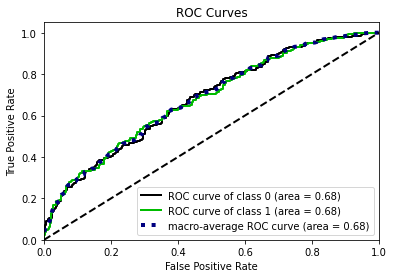

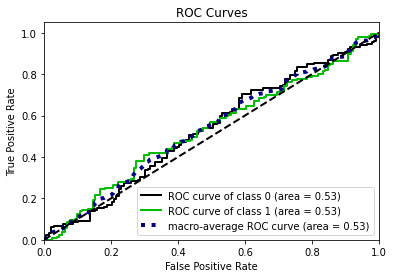

In [ ]:
plot_roc(y_true=yt['target'],y_probas=lr.predict_proba(Xt[var]),plot_micro=False)
plot_roc(y_true=yv['target'],y_probas=lr.predict_proba(Xv[var]),plot_micro=False)

In [ ]:
df['hora'] = df['fecha_hechos'].map(lambda x:x.hour)

In [ ]:
aux = df[['norm_delito','hora','latitud','longitud']].copy()

In [ ]:
aux = aux.dropna().reset_index(drop=True)

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=8)

In [ ]:
aux['cluster'] = gmm.fit_predict(aux[['latitud','longitud']])

In [ ]:
aux.head()

,norm_delito,hora,latitud,longitud,cluster
0,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,16,19.395398,-99.106072,3
1,VIOLENCIA FAMILIAR,11,19.395623,-99.105688,3
2,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,15,19.418040,-99.064113,3
3,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,15,19.400556,-99.061960,3
4,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,16,19.415407,-99.071993,3


In [ ]:
mapa = KeplerGl(height=600,width=800)
mapa.add_data(data=aux,name='delitos')
mapa

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'delitos': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,…

In [ ]:
for cl in range(8):
    aux.loc[(aux['cluster']==cl)&(aux['norm_delito']!='VIOLENCIA FAMILIAR')]['norm_delito'].value_counts().to_frame().iplot(kind='bar',
                                                                               title=f'Cluster{cl}')
    